В домашнем задании нужно улучшить метрики RMSE, R2 модели линейной регрессии путем работы с данными, а именно проведения разведочного анализа данных. В качестве датасета необходимо загрузить данные о недвижимости Калифорнии из библиотеки sklearn.datasets. Целевая переменная – MedHouseVal. 

In [942]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).

In [943]:
housing = fetch_california_housing()

In [944]:
print(fetch_california_housing().DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [945]:
housing.feature_names[0:8]

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [946]:
# Преобразуем данные в таблицу

data = pd.DataFrame(data=housing.data, columns=housing.feature_names)
data['MedHouseVal'] = housing.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [947]:
data['MedHouseVal'].value_counts().sort_values()

0.47000      1
2.91100      1
2.95700      1
3.06600      1
3.32300      1
          ... 
1.87500     93
1.12500    103
1.62500    117
1.37500    122
5.00001    965
Name: MedHouseVal, Length: 3842, dtype: int64

2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [948]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [949]:
data['MedInc'].sort_values().unique()

array([ 0.4999,  0.536 ,  0.5495, ..., 14.9009, 15.    , 15.0001])

In [950]:
data['HouseAge'].sort_values().unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.])

In [951]:
data['AveRooms'].sort_values().unique()

array([  0.84615385,   0.88888889,   1.        , ...,  62.42222222,
       132.53333333, 141.90909091])

In [952]:
data['AveBedrms'].sort_values().unique()

array([ 0.33333333,  0.375     ,  0.44444444, ..., 15.3125    ,
       25.63636364, 34.06666667])

In [953]:
data['Population'].sort_values().unique()

array([3.0000e+00, 5.0000e+00, 6.0000e+00, ..., 1.6305e+04, 2.8566e+04,
       3.5682e+04])

In [954]:
data['AveOccup'].sort_values().unique()

array([6.92307692e-01, 7.50000000e-01, 9.70588235e-01, ...,
       5.02461538e+02, 5.99714286e+02, 1.24333333e+03])

In [955]:
data['MedHouseVal'].sort_values().unique()

array([0.14999, 0.175  , 0.225  , ..., 4.991  , 5.     , 5.00001])

3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [956]:
print(data.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [957]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [958]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [959]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

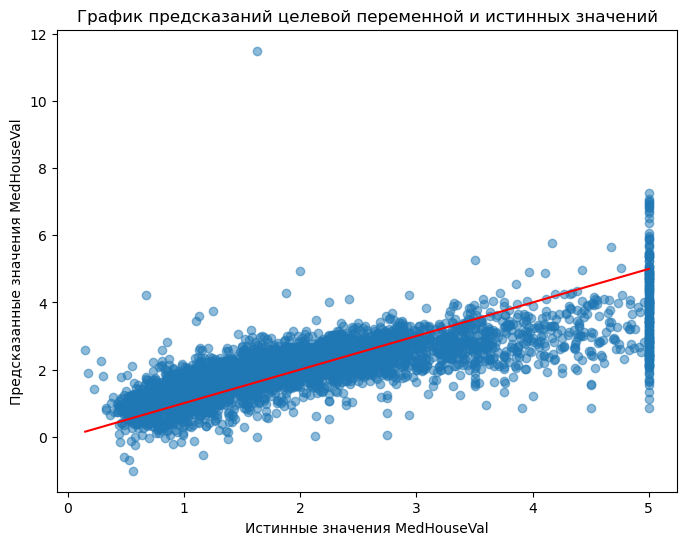

In [960]:
# Построим график предсказаний целевой переменной MedHouseVal

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-')  # линия регрессии
plt.xlabel('Истинные значения MedHouseVal')
plt.ylabel('Предсказанные значения MedHouseVal')
plt.title('График предсказаний целевой переменной и истинных значений')
plt.show()

In [961]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print(f"Обучающая выборка: RMSE = {rmse_train:.3f}, R2 = {r2_train:.3f}")

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)
print(f"Тестовая выборка: RMSE = {rmse_test:.3f}, R2 = {r2_test:.3f}")

Обучающая выборка: RMSE = 0.720, R2 = 0.613
Тестовая выборка: RMSE = 0.746, R2 = 0.576


5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

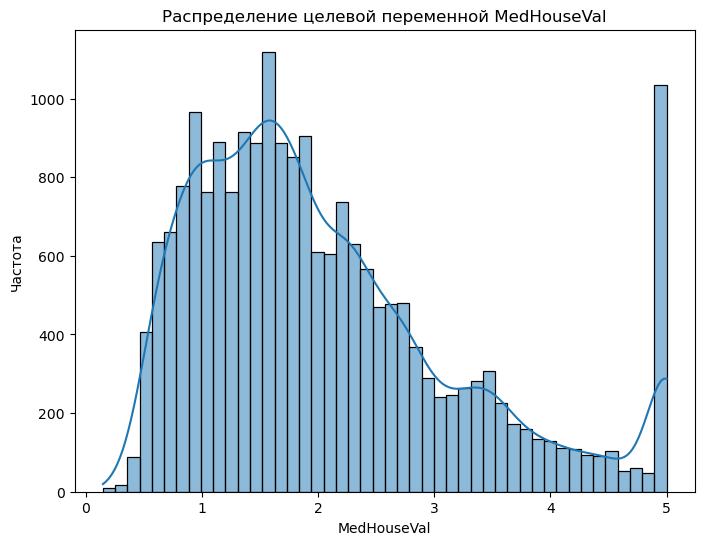

In [962]:
plt.figure(figsize=(8,6))
sns.histplot(y, kde=True)
       
plt.xlabel('MedHouseVal')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной MedHouseVal')
plt.show()

6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
* Сделайте выводы.
* Удалите признаки на основании полученных значений, выводов.
* Повторите п. 3, п. 4 на измененных данных.

In [963]:
corr_matrix = data.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


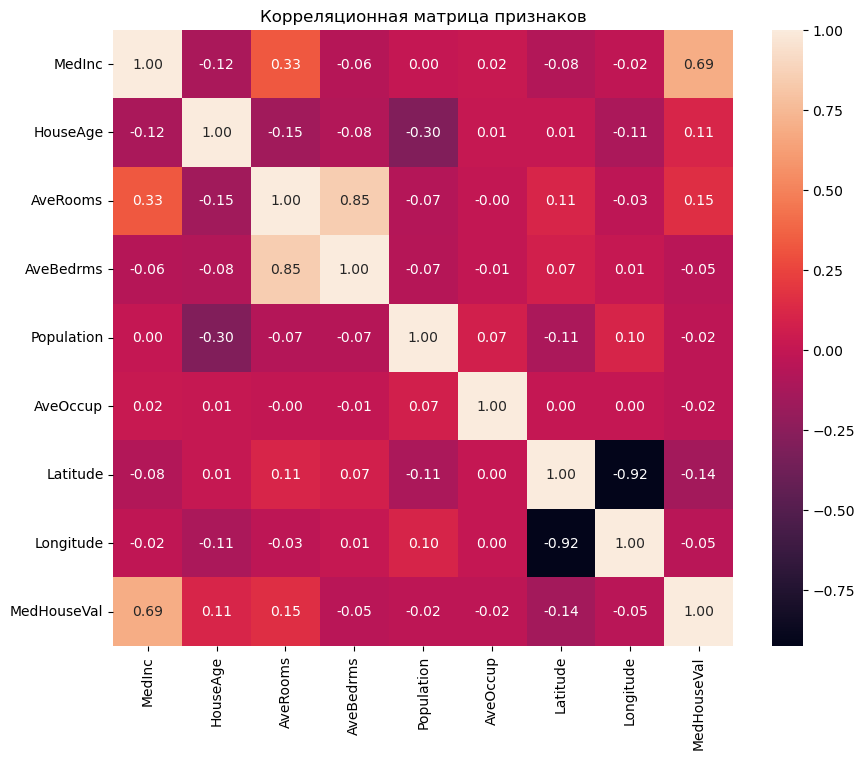

In [964]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title('Корреляционная матрица признаков')
plt.show()

In [965]:
print(data.columns.tolist())

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [966]:
# Удаляем признаки с нулевой корреляцией

X = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [967]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [968]:
# Удаляя признаки, получаем результат хуже

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print(f"Обучающая выборка: RMSE = {rmse_train:.3f}, R2 = {r2_train:.3f}")

rmse_test_del_feature = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test_del_feature = r2_score(y_test, y_test_pred)
print(f"Тестовая выборка: RMSE = {rmse_test:.3f}, R2 = {r2_test:.3f}")

Обучающая выборка: RMSE = 0.799, R2 = 0.523
Тестовая выборка: RMSE = 0.746, R2 = 0.576


7. Исследуйте оставленные признаки на выбросы.
* Удалите выбросы в случае обнаружения.
* Повторите п. 3, п. 4 на измененных данных.

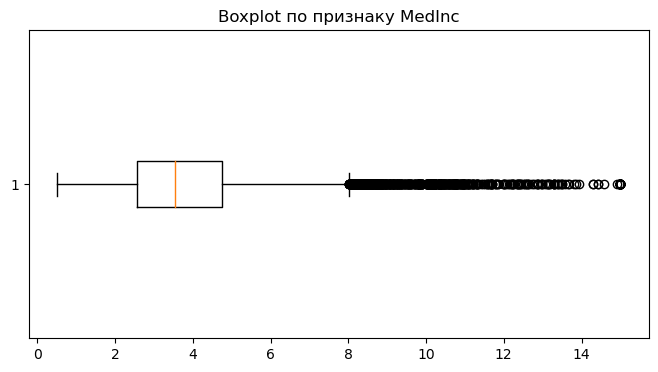

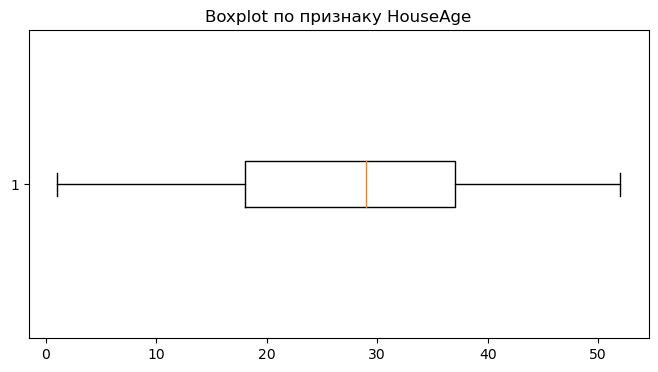

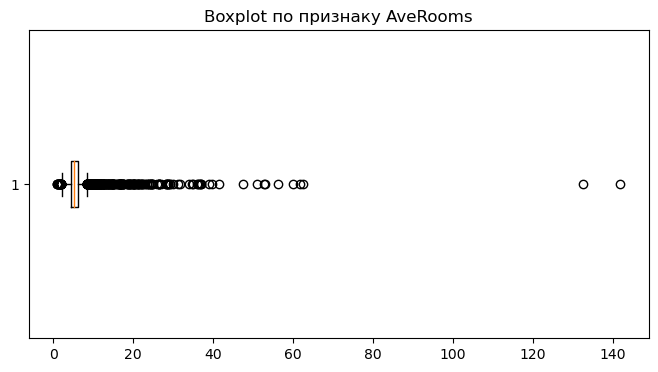

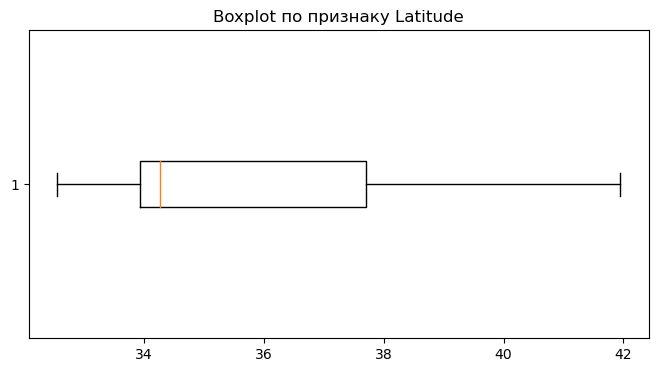

In [969]:
# Визуализируем boxplot для признаков на train-данных

for feature in ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[feature], vert=False)
    plt.title(f'Boxplot по признаку {feature}')
    plt.show()

In [970]:
# Определим первый Q1 и Q3 квартиль и IQR межквартильный размах
# Удалим выбросы

for feature in ['MedInc', 'AveRooms']:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    print(f"Признак: {feature}")
    print(f"Выбросы: {len(outliers)}")
    print(f"Квартиль Q1: {Q1:.2f}")
    print(f"Квартиль Q3: {Q3:.2f}")
    print(f"IQR: {IQR:.2f}")
    print(f"lower_bound: {lower_bound:.2f}")
    print(f"upper_bound: {upper_bound:.2f}")
    print(outliers[feature].sort_values(ascending=False).head())
    
    data = data[data[feature] <= upper_bound]

Признак: MedInc
Выбросы: 681
Квартиль Q1: 2.56
Квартиль Q3: 4.74
IQR: 2.18
lower_bound: -0.71
upper_bound: 8.01
18501    15.0001
8846     15.0001
1566     15.0001
15693    15.0001
17110    15.0001
Name: MedInc, dtype: float64
Признак: AveRooms
Выбросы: 439
Квартиль Q1: 4.41
Квартиль Q3: 5.96
IQR: 1.55
lower_bound: 2.09
upper_bound: 8.28
1914     141.909091
1979     132.533333
12447     62.422222
1913      61.812500
11862     59.875000
Name: AveRooms, dtype: float64


In [971]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
y = data['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [972]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [973]:
# Удаляя выбросы, получаем результат хуже первоначального

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print(f"Обучающая выборка: RMSE = {rmse_train:.3f}, R2 = {r2_train:.3f}")

rmse_test_del_bound = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test_del_bound = r2_score(y_test, y_test_pred)
print(f"Тестовая выборка: RMSE = {rmse_test:.3f}, R2 = {r2_test:.3f}")

Обучающая выборка: RMSE = 0.772, R2 = 0.473
Тестовая выборка: RMSE = 0.746, R2 = 0.576


8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень. Повторите п. 3, п. 4 на измененных данных.

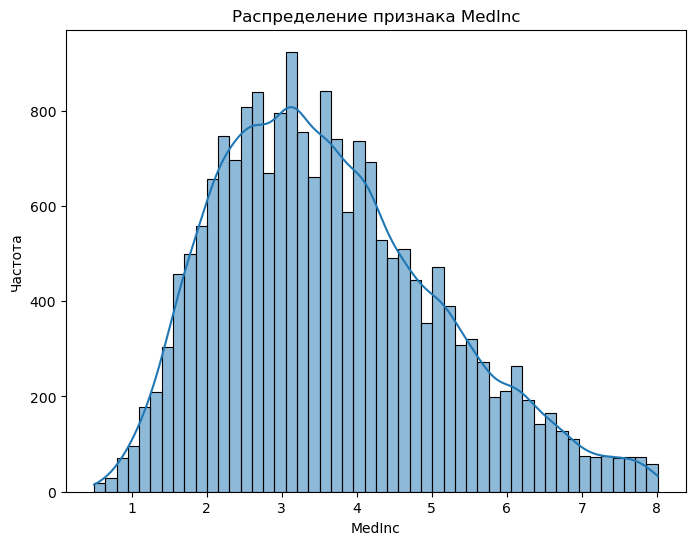

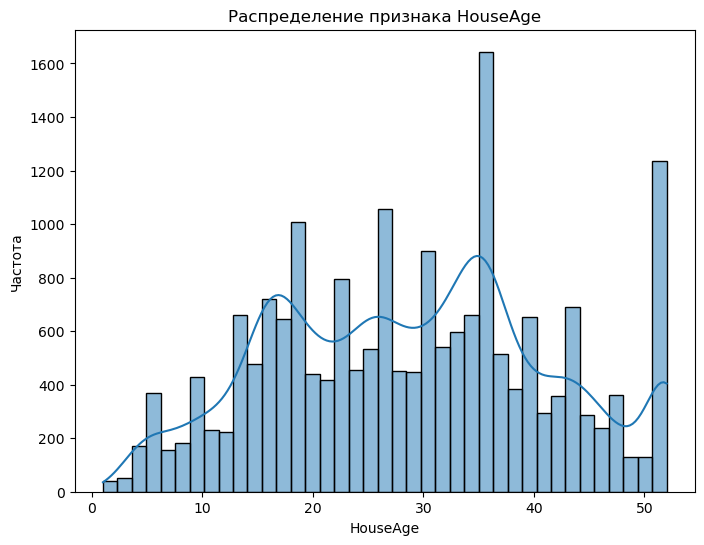

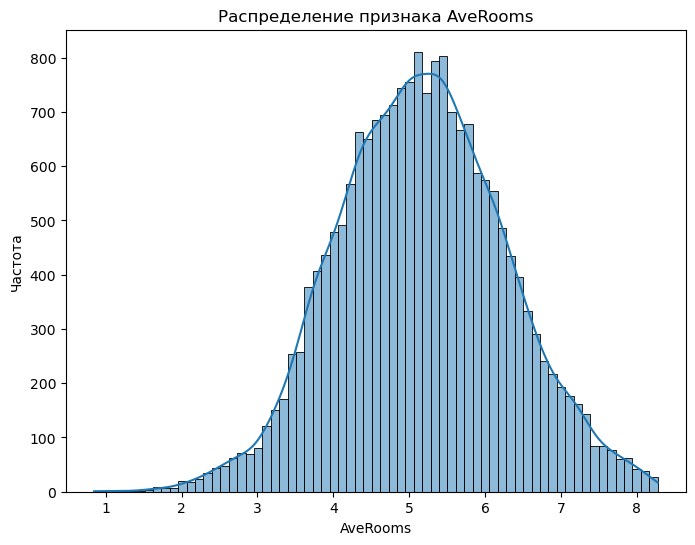

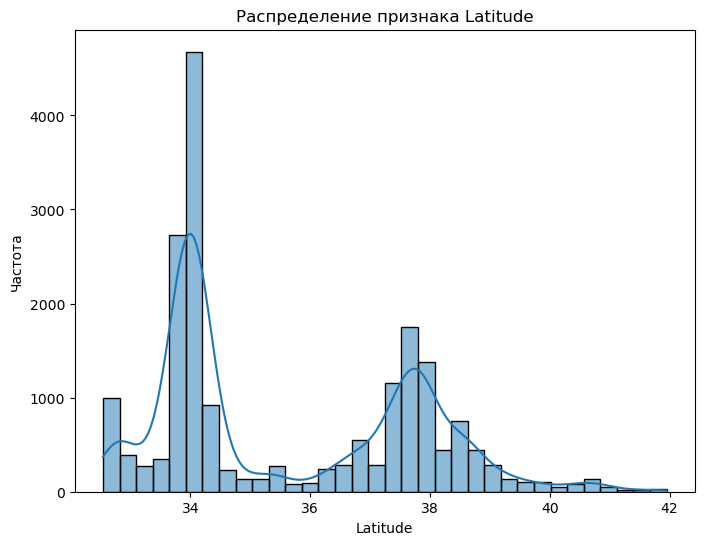

In [974]:
for feature in ['MedInc', 'HouseAge', 'AveRooms', 'Latitude']:
    plt.figure(figsize=(8,6))
    sns.histplot(data[feature], kde=True)

    plt.xlabel(f'{feature}')
    plt.ylabel('Частота')
    plt.title(f'Распределение признака {feature}')
    plt.show()

In [975]:
# Преобразуем используемые признаки

scaler = StandardScaler()
scaler_minmax = MinMaxScaler()

# data['MedInc'] = np.log1p(data['MedInc']) # Логарифмирование
# data[feature] = scaler.fit_transform(data[feature]) # Стандартизация
# data[feature] = scaler_minmax.fit_transform(data[feature]) # Нормализация

In [976]:
# Используем Логарифмирование для входных признаков

X = data[['MedInc', 'HouseAge', 'AveRooms', 'Latitude']]
y = data['MedHouseVal']

X_scaled = np.log1p(X)

In [977]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [978]:
model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [979]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
print(f"Обучающая выборка: RMSE = {rmse_train:.3f}, R2 = {r2_train:.3f}")

rmse_test_log = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test_log = r2_score(y_test, y_test_pred)
print(f"Тестовая выборка: RMSE = {rmse_test:.3f}, R2 = {r2_test:.3f}")

Обучающая выборка: RMSE = 0.798, R2 = 0.436
Тестовая выборка: RMSE = 0.746, R2 = 0.576


9. Сформулируйте выводы по проделанной работе.
* Кратко опишите какие преобразования были сделаны с данными.
* Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
* Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.

In [980]:
data = {
    'Модель': ['LinearRegression Full', 'LinearRegression removed features', 'LinearRegression removed outliers', 'LinearRegression Log'],
    'RMSE': [rmse_test, rmse_test_del_feature, rmse_test_del_bound, rmse_test_log],
    'R2': [r2_test, r2_test_del_feature, r2_test_del_bound, r2_test_log]
}

In [981]:
data = pd.DataFrame(data)
print(data)

                              Модель      RMSE        R2
0              LinearRegression Full  0.745581  0.575788
1  LinearRegression removed features  0.805945  0.504317
2  LinearRegression removed outliers  0.755210  0.487202
3               LinearRegression Log  0.784995  0.445956


### Вывод:
Обучили модель с помощью Линейной регрессии. На первоначальном решении модель показала лучшие метрики качества.
Удаление ненужных признаков со слабой зависимостью только ослабили модель. Удаление выбросов и преобразование входных признаков не оказало должного влияния.